# MNIST

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data():
    datas = list()
    save_path = "../Output/CIFAR100-*-N100-*/s[1-9].csv"
    path_list = glob.glob(save_path)
    # for path in path_list:
    #     if "CIFAR100-fedavg-G00-B0-D0-" in path:
            # print(path)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "Balanced IID partition", 
                                                0.3: "Balanced Dirichlet partition (α=0.3)", 
                                                })
    # data_temp['Mode'] = data_temp['Mode'] .map({'fedavg': "FedAvg", 
    #                                             'fedprox': "FedProx", 
    #                                             'scaffold': "Scaffold",  
    #                                             'feddyn': "FedDyn", 
    #                                             # 'G11': "FedGN",
    #                                            })
    # print(data_temp["Mode"].unique())
    # sk = ["Balanced IID partition", "Balanced Dirichlet partition (α=0.3)"]
    # data_temp = data_temp.set_index('Distribution').loc[sk].reset_index()
    # sk = ['FedAvg', 'FedProx', 'Scaffold', 'FedDyn']
    # data_temp = data_temp.set_index('Mode').loc[sk].reset_index()
    # print(data_temp.size)
    return data_temp

In [3]:
def get_concat(foldername, seeds):
    for i, seed in enumerate(seeds):
        if i == 0: data = pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))
        else: 
            try: 
                data = pd.concat([data, pd.read_csv(os.path.join(save_path,foldername,"s{}.csv".format(seed)))])
            except:
                pass
    # print(foldername, len(data))
    return data

def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]

        if "Mean1" in path:
            data["Mode"] += "_M1"
            # continue
        elif "Mean2" in path:
            data["Mode"] += "_M2"
            # continue
        elif "Mean3" in path:
            data["Mode"] += "Mean3"
            continue
        elif "Mean4" in path:
            data["Mode"] += "Mean4"
            continue
        elif "Mean5" in path:
            data["Mode"] += "_M5"
        elif "Mean6" in path:
            data["Mode"] += "Mean6"
            continue
        elif "LogitNorm_BNinit0" in path:
            data["Mode"] += "LogitNorm+BN"
            continue
        elif "BN00+G00" in path:
            data["Mode"] += "_BN00"
            continue
        elif "BN00+G01" in path:
            data["Mode"] += "_BN01"
            continue
        elif "BNinit0" in path:
            data["Mode"] += "BNinit0"
            continue
        elif "fc" in path:
            continue
        elif "ec" in path:
            continue

        if "Mean5-LR" in path and "G25" in path:
            data["Mode"] += "_G2_LR" + path.split("LR")[1].split("/")[0]
            continue

        if "Mean5-LR0.3" in path and "G05" in path:
            data["Mode"] += "_G05_LR0.3"
            continue
        elif "Mean5-LR0.05" in path and "G05" in path:
            data["Mode"] += "_G05_LR0.05"
        elif "Mean5-LR2.0" in path and "G15" in path:
            data["Mode"] += "_G15_LR2.0"
        elif "Mean5-LR3.0" in path and "G15" in path:
            data["Mode"] += "_G15_LR3.0"
            continue
        elif "Mean5-LR0.8" in path and "G15" in path:
            data["Mode"] += "_G15_LR0.8"
        elif "Mean5-LR1.0" in path and "G15" in path:
            data["Mode"] += "_G15_LR1.0"
        
        
        if "PCOS1" in path and "G05":
            data["Mode"] += "_PCOS1"
            # continue
        elif "PCOS1_Mean5-LR0.1-SWA1" in path and "G05":
            data["Mode"] += "_PCOS1-SWA"
            continue
        elif "PCOS1_Mean5-LR1.0-SWA1" in path and "G15":
            data["Mode"] += "_PCOS1-SWA"
            continue
        elif "PCOS1_Mean5-LR0.1" in path and "G05" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
            continue
        elif "PCOS1_Mean5-LR1.0" in path and "G15" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
            continue
        elif "PCOS1_Mean5-LR2.0" in path and "G15" in path and "PCOS1" in path:
            data["Mode"] += "_PCOS1"
            continue


        if "GNStopEP20" in path:
            data["Mode"] += "_EP20"
            continue
        elif "GNStopEP50" in path:
            data["Mode"] += "_EP50"
            continue
        elif "GNStopEP100" in path:
            data["Mode"] += "_EP100"
            continue
        elif "Mean5-LR1.2" in path:
            data["Mode"] += "_G15_LR1.2"
            continue
        elif "Mean5_EPS0.1-LR1.2" in path:
            data["Mode"] += "_G15_EP0.1"
            continue
        elif "Mean5_EPS1.0-LR1.2" in path:
            data["Mode"] += "_G15_EP1.0"
            continue

        if "G15" in path and "PCOS" in path:
            continue

        if len(data_) == 0: 
            data_ = data
        else: 
            data_ = pd.concat([data_, data])
    return data_

(27645, 20)


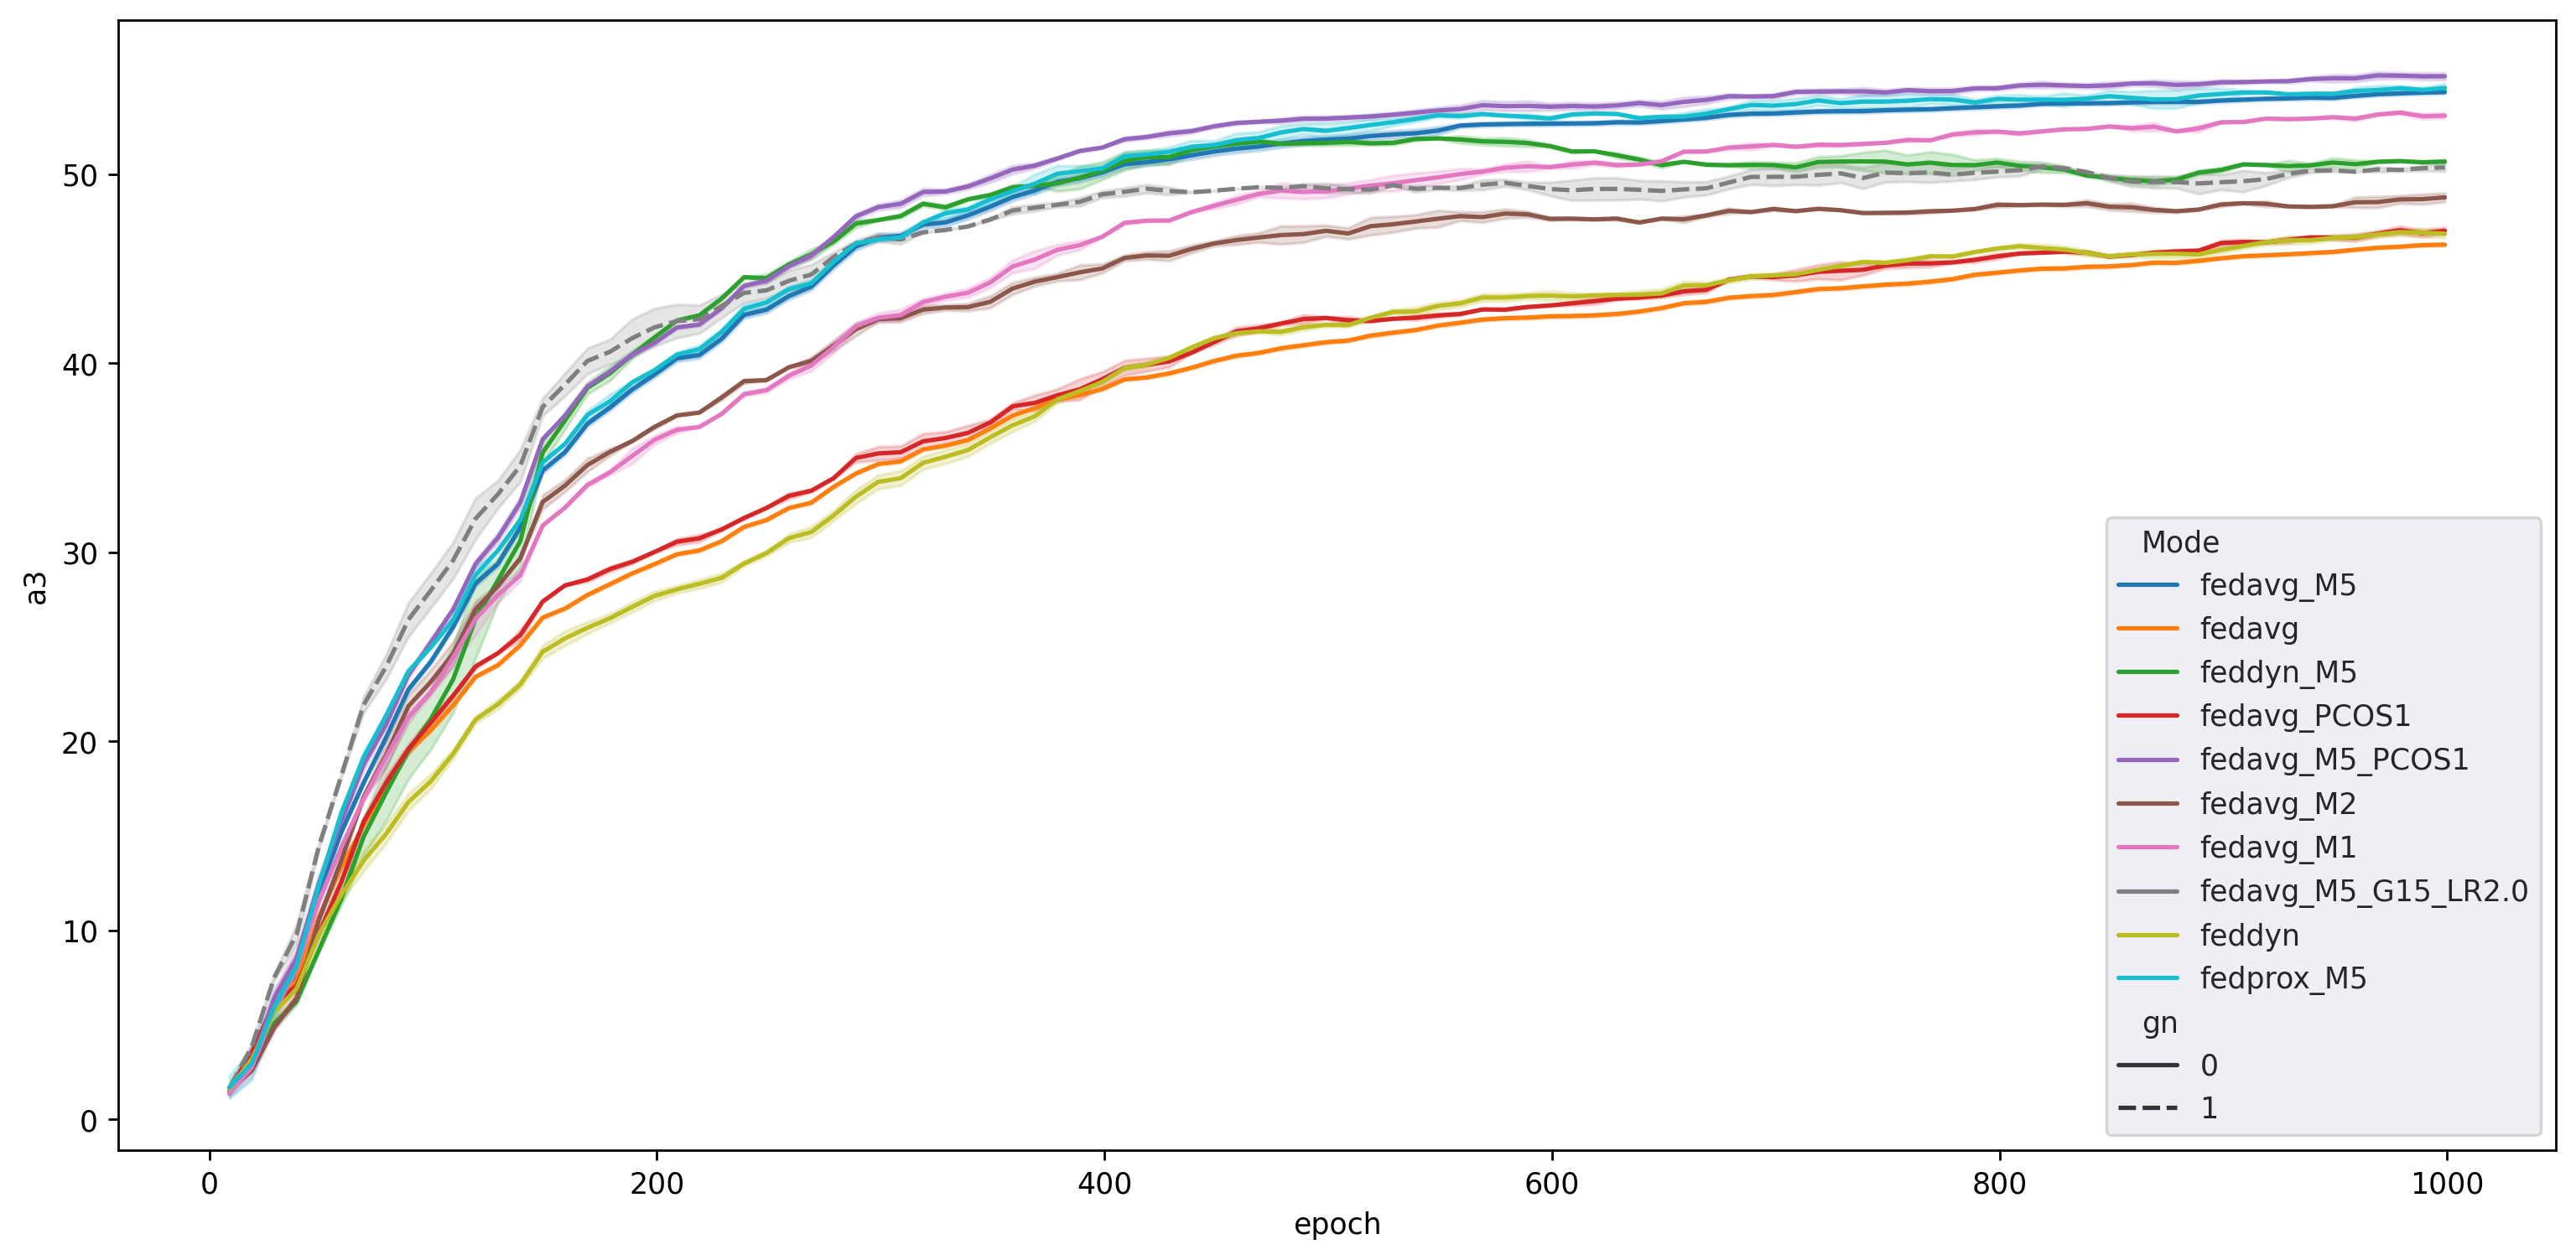

In [4]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=250, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold") & (temp["Mode"] != "feddynMean5") & (temp["Mode"] != "fedproxMean5")]
    print(temp.shape)
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")

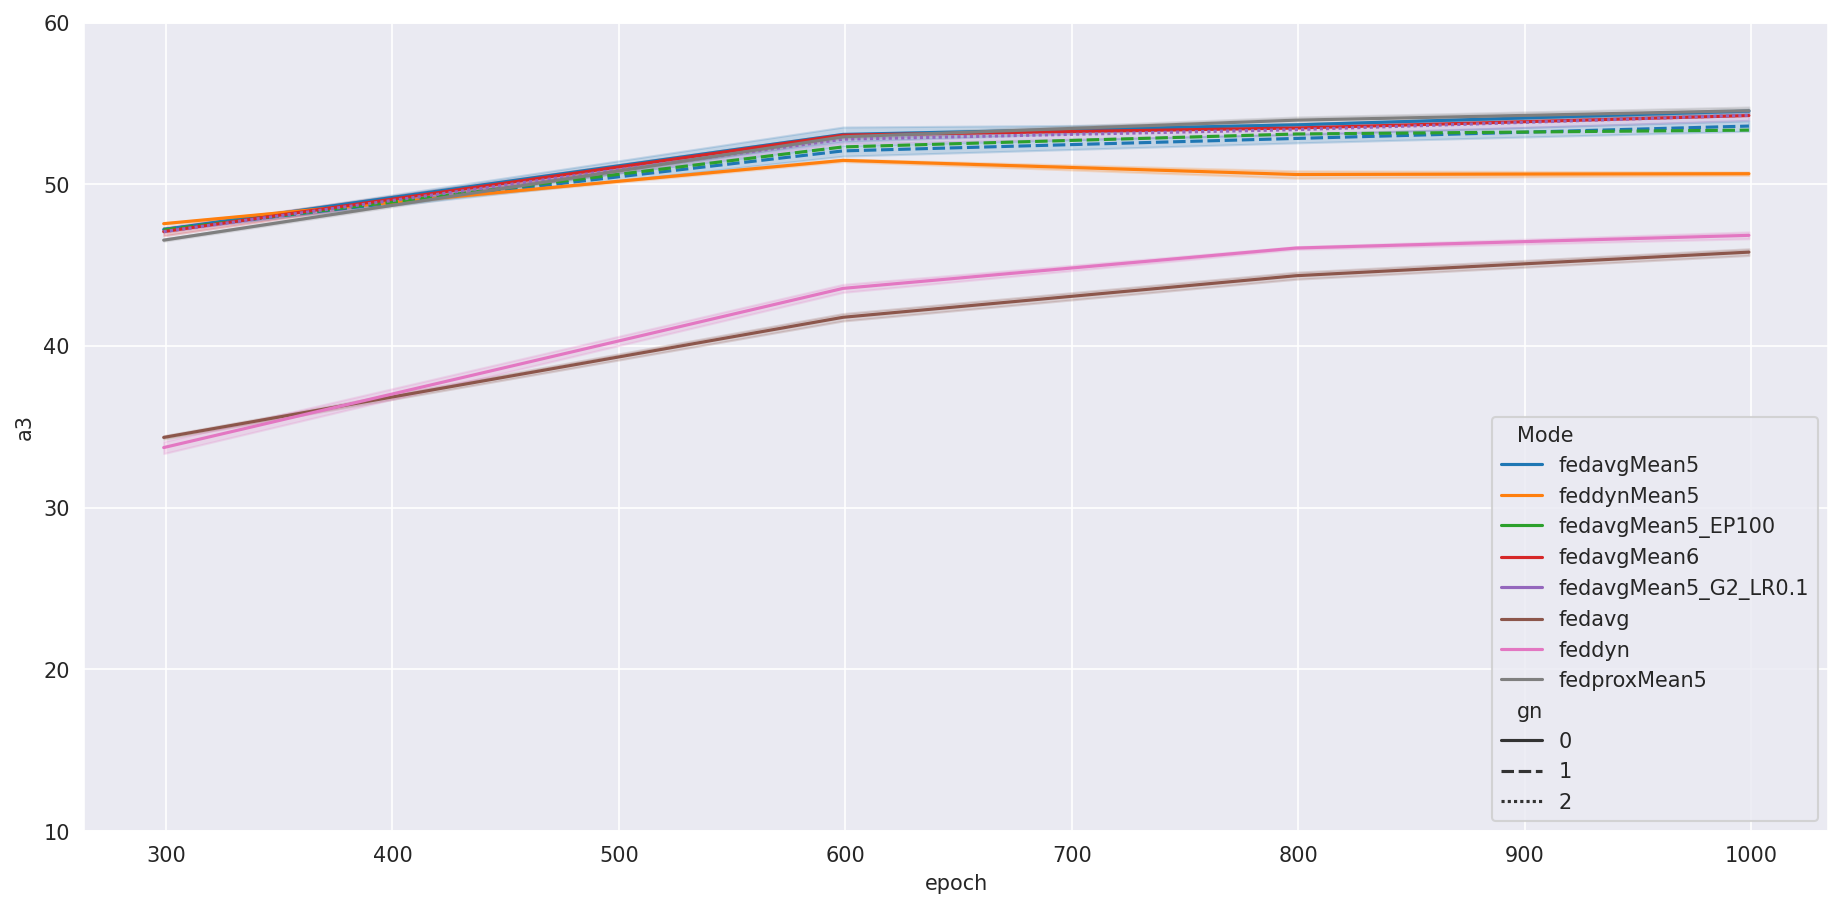

In [150]:
data_temp = load_data()

fig, axes = plt.subplots(1, 1, figsize=(15,7), dpi=150, sharey=False)
sns.set_style("darkgrid")

for ax, ap, lr in zip([axes], [0.01], [1.2]):
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == ap]
    temp = temp[(temp["epoch"] == 299) | (temp["epoch"] == 599) | (temp["epoch"] == 799) | (temp["epoch"] == 999)]
    temp = temp[(temp["Mode"] != "fedprox") & (temp["Mode"] != "scaffold")]
    temp = temp[(temp["Distribution"] == "Balanced IID partition")]
    # ax = sns.barplot(data=temp, x="Mode", y="a3", hue="gn", ax=ax, errorbar="se")
    ax = sns.lineplot(data=temp, x="epoch", y="a3", hue="Mode", style="gn", ax=ax, errorbar="se")
    ax.set_ylim([10,60])